In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline
from pylab import savefig

from datetime import datetime
import time

In [2]:
df = pd.read_csv('MaratonadePoA2019.csv',index_col='Num')

In [115]:
df.head()

,Coloc,Nome,Sexo,Idade,Faixa,Cl.Fx.,Equipe,Tempo,Liquido
Num,,,,,,,,,
43,1,ALISSON PERES DA ROCHA,M,29,M2529,-,CIA DOS CAVALOS,2:18:30,2:18:27
4,2,ELIJAH CHEBONEI,M,26,M2529,-,LUASA SPORTS/MANTLE -,2:19:15,2:19:12
19,3,LAURINDO NUNES NETO,M,26,M2529,-,HORBACH RUNNING/ FILA,2:20:03,2:20:00
35,4,ALESSANDRO DOS SANTOS,M,25,M2529,-,4RUN ASSESSORIA,2:24:44,2:24:41
17,5,GUSTAVO MOREIRA DE BITENCOURT,M,29,M2529,-,APA/EXÃ‰RCITO BRASILEIRO,2:26:36,2:26:33


In [116]:
df.dtypes

Coloc       int64
Nome       object
Sexo       object
Idade       int64
Faixa      object
Cl.Fx.     object
Equipe     object
Tempo      object
Liquido    object
dtype: object

In [3]:
#Convertendo as colunas de tempo e liquido para deltas
df.iloc[:, 7:9] = df.iloc[:, 7:9].apply(pd.to_timedelta)

In [118]:
df.dtypes

Coloc                int64
Nome                object
Sexo                object
Idade                int64
Faixa               object
Cl.Fx.              object
Equipe              object
Tempo      timedelta64[ns]
Liquido    timedelta64[ns]
dtype: object

In [119]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3167 entries, 43 to 1481
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype          
---  ------   --------------  -----          
 0   Coloc    3167 non-null   int64          
 1   Nome     3167 non-null   object         
 2   Sexo     3167 non-null   object         
 3   Idade    3167 non-null   int64          
 4   Faixa    3167 non-null   object         
 5   Cl.Fx.   3167 non-null   object         
 6   Equipe   2497 non-null   object         
 7   Tempo    3167 non-null   timedelta64[ns]
 8   Liquido  3167 non-null   timedelta64[ns]
dtypes: int64(2), object(5), timedelta64[ns](2)
memory usage: 247.4+ KB


,Coloc,Nome,Sexo,Idade,Faixa,Cl.Fx.,Equipe,Tempo,Liquido
Num,,,,,,,,,
43,1,ALISSON PERES DA ROCHA,M,29,M2529,-,CIA DOS CAVALOS,02:18:30,02:18:27
4,2,ELIJAH CHEBONEI,M,26,M2529,-,LUASA SPORTS/MANTLE -,02:19:15,02:19:12
19,3,LAURINDO NUNES NETO,M,26,M2529,-,HORBACH RUNNING/ FILA,02:20:03,02:20:00
35,4,ALESSANDRO DOS SANTOS,M,25,M2529,-,4RUN ASSESSORIA,02:24:44,02:24:41
17,5,GUSTAVO MOREIRA DE BITENCOURT,M,29,M2529,-,APA/EXÃ‰RCITO BRASILEIRO,02:26:36,02:26:33


In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Coloc,3167,1023.89,722.677,1,396.5,857,1648.5,2440
Idade,3167,41.425,9.36874,20,35,40,47,80
Tempo,3167,0 days 04:07:21.793495,0 days 00:42:38.121744,0 days 02:18:30,0 days 03:37:03.500000,0 days 04:03:49,0 days 04:35:47,0 days 06:24:06
Liquido,3167,0 days 04:04:09.221029,0 days 00:41:00.539934,0 days 02:18:27,0 days 03:35:27,0 days 04:00:27,0 days 04:31:11.500000,0 days 06:19:33


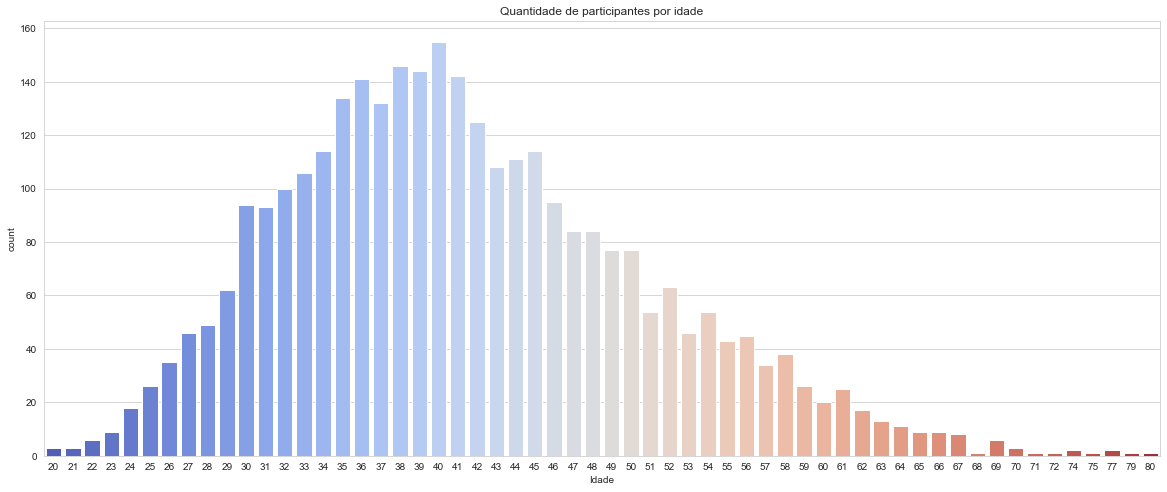

In [7]:
g = sns.countplot('Idade', data=df, palette="coolwarm")
g.figure.set_size_inches(20,8)
g.set_title("Quantidade de participantes por idade")
#g.figure.savefig("Quantidade de participantes por idade.png")

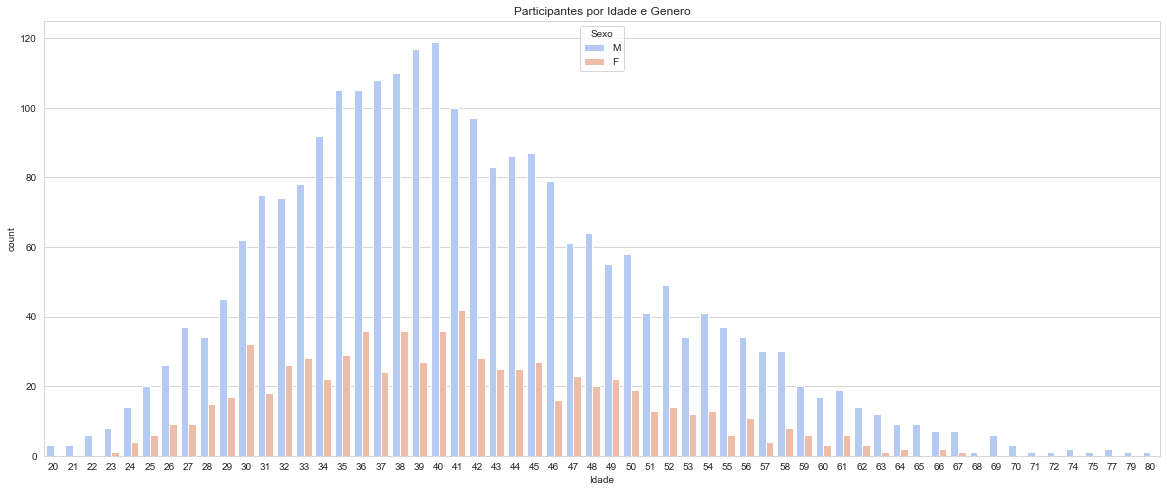

In [8]:
g = sns.countplot(x='Idade', data=df, hue='Sexo', palette="coolwarm")
g.figure.set_size_inches(20,8)
g.set_title("Participantes por Idade e Genero")
#g.figure.savefig("Participantes por Idade e Genero.png")

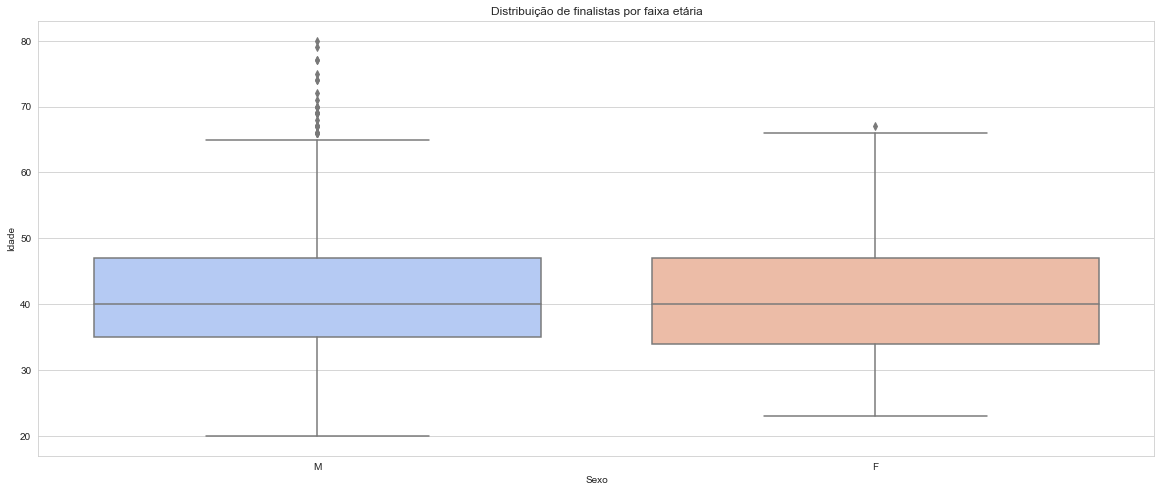

In [9]:
#Boxplot por idade e genero
g = sns.boxplot(df['Sexo'], df['Idade'], palette="coolwarm")
g.figure.set_size_inches(20,8)
g.set_title("Distribuição de finalistas por faixa etária")
#g.figure.savefig("Distribuição de finalistas por faixa etária.png")

AttributeError: 'JointGrid' object has no attribute 'figure'

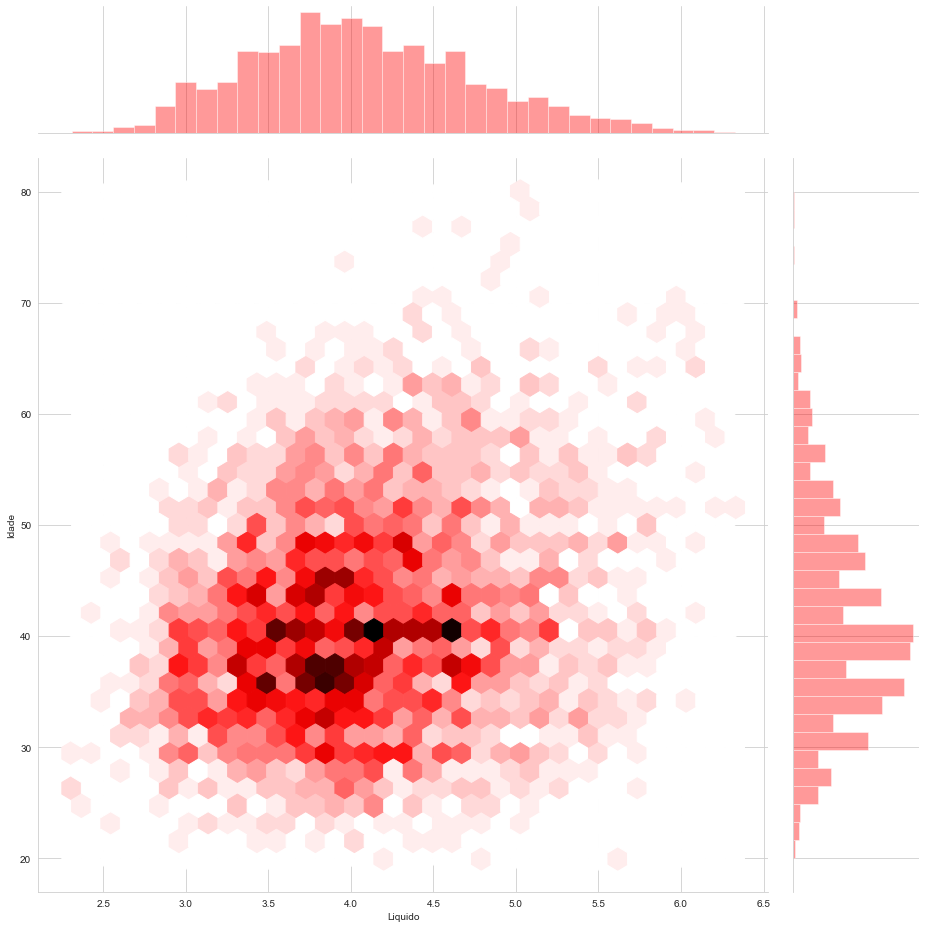

In [11]:
#Distribuição dos tempos Liquidos por idade
g = sns.jointplot( x=df['Liquido'].apply(lambda x: x.total_seconds()/3600), y=df['Idade'], stat_func=None, kind='hex', color="r", height=13)
#g.figure.savefig("Distribuição dos tempos Liquidos por idade.png")

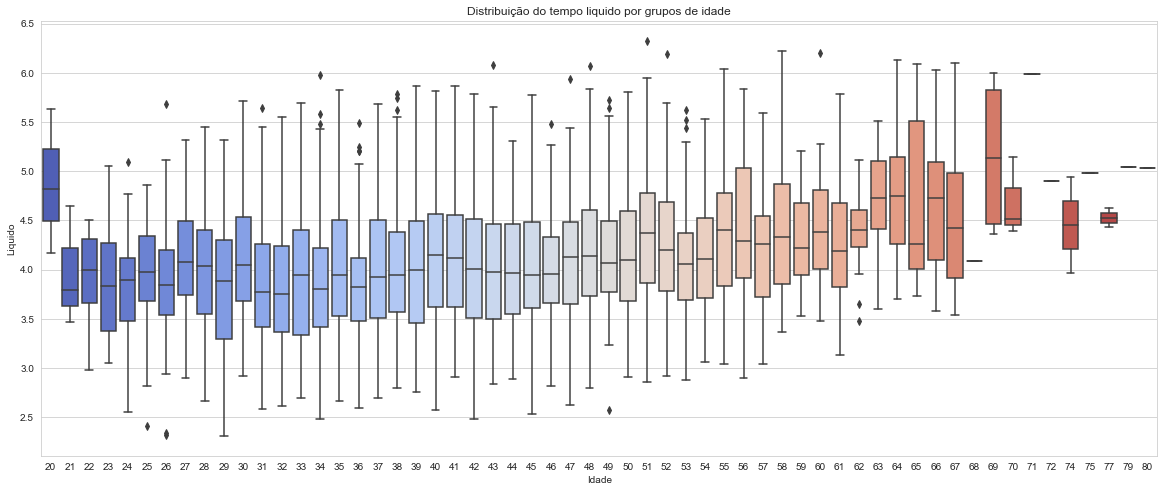

In [12]:
g = sns.boxplot(df['Idade'], df['Liquido'].apply(lambda x: x.total_seconds()/3600), palette="coolwarm")
g.figure.set_size_inches(20,8)
g.set_title("Distribuição do tempo liquido por grupos de idade")
#g.figure.savefig("Distribuição do tempo liquido por grupos de idade.png")

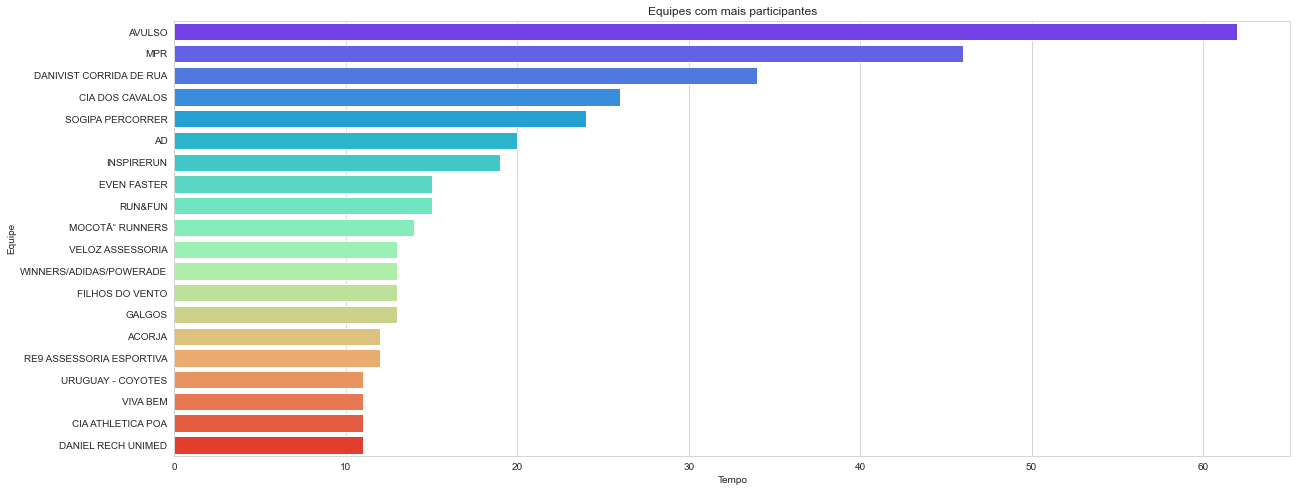

In [13]:
s = df.groupby('Equipe').count()['Tempo'].sort_values(ascending=False).head(20)
g = sns.barplot(y=s.index, x=s, palette='rainbow')
g.figure.set_size_inches(20,8)
g.set_title("Equipes com mais participantes")
#g.figure.savefig("Equipes com mais participantes.png")